In [214]:
import numpy as np
import pandas as pd
import seaborn as sns

In [215]:
import matplotlib.pyplot as plt

In [216]:
df=pd.read_csv('Housing.csv')

In [217]:
print(df.head())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking furnishingstatus  
0              no             yes        2        furnished  
1              no             yes        3        furnished  
2              no              no        2   semi-furnished  
3              no             yes        3        furnished  
4              no             yes        2        furnished  


In [218]:
print(f'shape of data:{df.shape}')

shape of data:(545, 12)


In [219]:
print('info about data:', df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  furnishingstatus  545 non-null    object
dtypes: int64(6), object(6)
memory usage: 51.2+ KB
info about data: None


# Descriptive statistics on the dataset

In [220]:
df.describe() #dataset doesn’t have any missing values

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


# Find duplicate values

In [221]:
duplicate=df.duplicated()
print(duplicate.sum()) #no duplicate found

0


# Handling the outliers

<Figure size 1000x500 with 0 Axes>

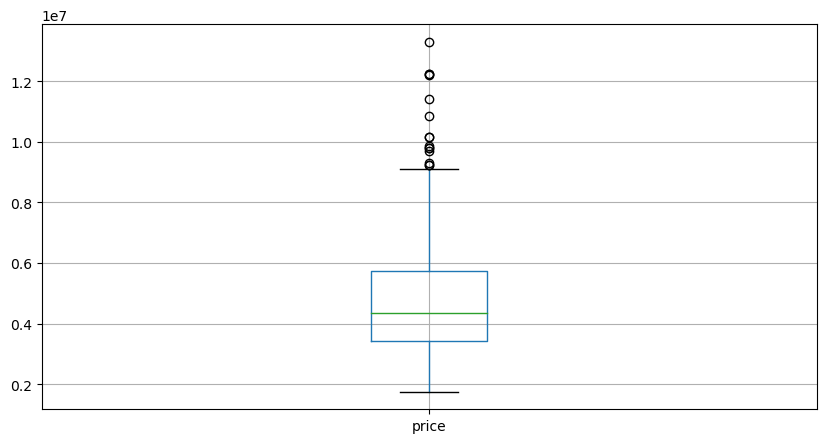

In [222]:
df.boxplot(column=['price'])
plt.show()

In [223]:
def removeoutliers(col):
    sorted(col)
    q1, q2 =col.quantile([0.25,0.75])
    iqr=q2-q1
    lower=q1-(1.5*iqr)
    upper=q2+(1.5*iqr)
    return lower,upper
lowerrange,upperrange=removeoutliers(df['price']) 

In [224]:
df['price_revoutliner']=np.where(df['price']<lowerrange,lowerrange,df['price']) 
df['price_revoutliner']=np.where(df['price']>upperrange,upperrange,df['price'])

In [225]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus,price_revoutliner
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,furnished,9205000.0
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,furnished,9205000.0
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,semi-furnished,9205000.0
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,furnished,9205000.0
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,furnished,9205000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,unfurnished,1820000.0
541,1767150,2400,3,1,1,no,no,no,no,no,0,semi-furnished,1767150.0
542,1750000,3620,2,1,1,yes,no,no,no,no,0,unfurnished,1750000.0
543,1750000,2910,3,1,1,no,no,no,no,no,0,furnished,1750000.0


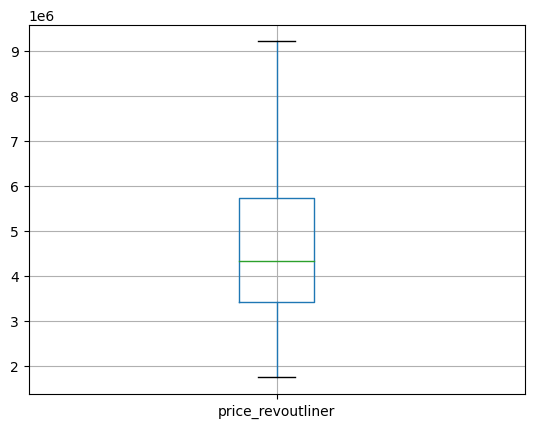

In [226]:
df.boxplot(column=['price_revoutliner'])
plt.show()

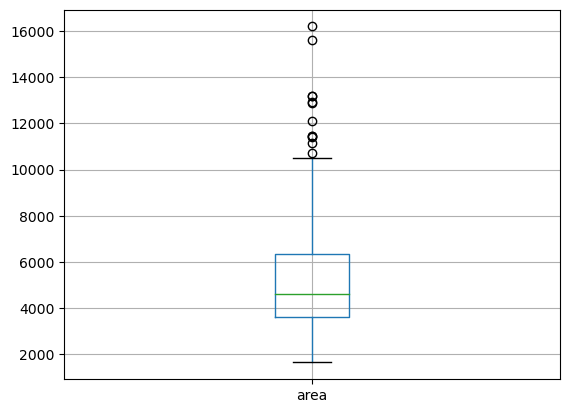

In [227]:
df.boxplot(column=['area'])
plt.show()

In [228]:
df.boxplot(column='area')

<Axes: >

In [229]:
lowerrange,upperrange=removeoutliers(df['area']) 
df['area_revoutliner']=np.where(df['area']<lowerrange,lowerrange,df['area']) 
df['area_revoutliner']=np.where(df['area']>upperrange,upperrange,df['area'])

In [230]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus,price_revoutliner,area_revoutliner
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,furnished,9205000.0,7420.0
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,furnished,9205000.0,8960.0
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,semi-furnished,9205000.0,9960.0
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,furnished,9205000.0,7500.0
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,furnished,9205000.0,7420.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,unfurnished,1820000.0,3000.0
541,1767150,2400,3,1,1,no,no,no,no,no,0,semi-furnished,1767150.0,2400.0
542,1750000,3620,2,1,1,yes,no,no,no,no,0,unfurnished,1750000.0,3620.0
543,1750000,2910,3,1,1,no,no,no,no,no,0,furnished,1750000.0,2910.0


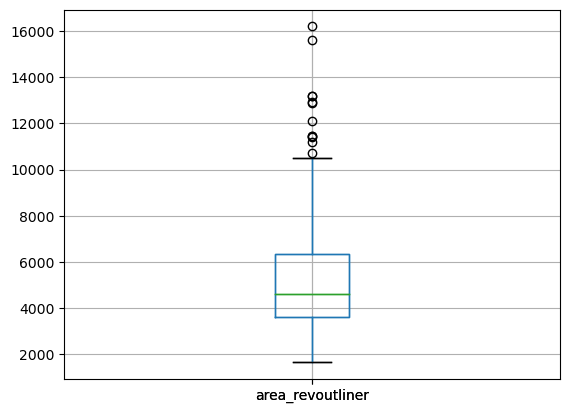

In [231]:
df.boxplot(column=['area_revoutliner'])
plt.show()

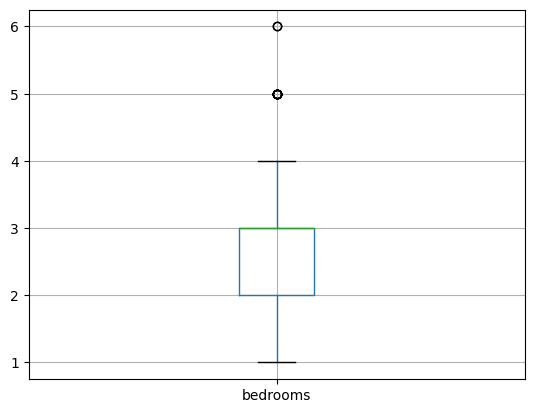

In [232]:
df.boxplot(column=['bedrooms'])
plt.show()

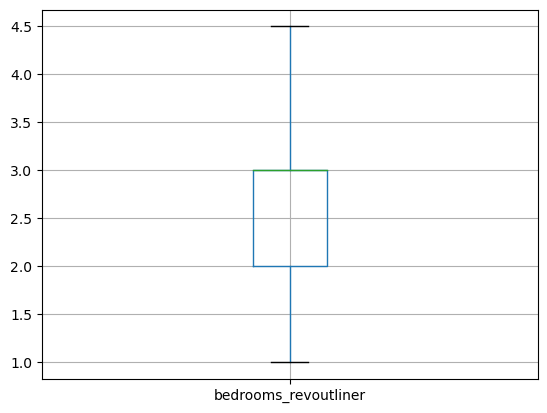

In [233]:
lowerrange,upperrange=removeoutliers(df['bedrooms']) 
df['bedrooms_revoutliner']=np.where(df['bedrooms']<lowerrange,lowerrange,df['bedrooms']) 
df['bedrooms_revoutliner']=np.where(df['bedrooms']>upperrange,upperrange,df['bedrooms'])
df.boxplot(column=['bedrooms_revoutliner'])
plt.show()

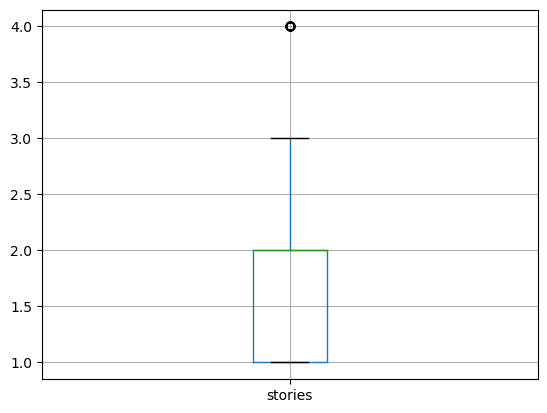

In [234]:
df.boxplot(column=['stories'])
plt.show()

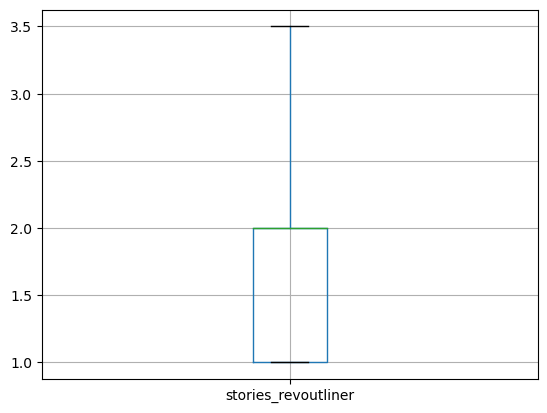

In [235]:
lowerrange,upperrange=removeoutliers(df['stories']) 
df['stories_revoutliner']=np.where(df['stories']<lowerrange,lowerrange,df['stories']) 
df['stories_revoutliner']=np.where(df['stories']>upperrange,upperrange,df['stories'])
df.boxplot(column=['stories_revoutliner'])
plt.show()

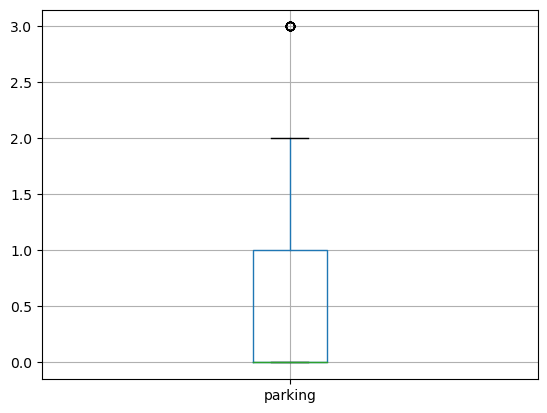

In [236]:
df.boxplot(column=['parking'])
plt.show()

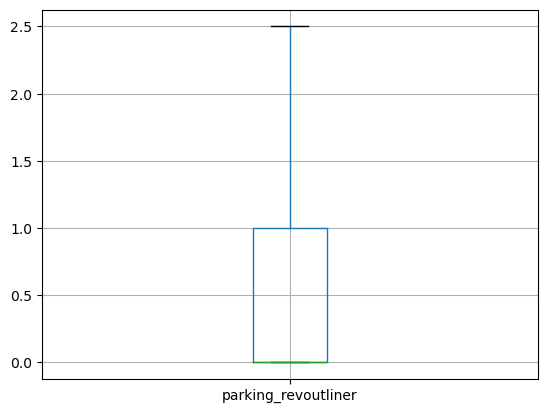

In [237]:
lowerrange,upperrange=removeoutliers(df['parking']) 
df['parking_revoutliner']=np.where(df['parking']<lowerrange,lowerrange,df['parking']) 
df['parking_revoutliner']=np.where(df['parking']>upperrange,upperrange,df['parking'])
df.boxplot(column=['parking_revoutliner'])
plt.show()

In [238]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus,price_revoutliner,area_revoutliner,bedrooms_revoutliner,stories_revoutliner,parking_revoutliner
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,furnished,9205000.0,7420.0,4.0,3.0,2.0
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,furnished,9205000.0,8960.0,4.0,3.5,2.5
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,semi-furnished,9205000.0,9960.0,3.0,2.0,2.0
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,furnished,9205000.0,7500.0,4.0,2.0,2.5
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,furnished,9205000.0,7420.0,4.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,unfurnished,1820000.0,3000.0,2.0,1.0,2.0
541,1767150,2400,3,1,1,no,no,no,no,no,0,semi-furnished,1767150.0,2400.0,3.0,1.0,0.0
542,1750000,3620,2,1,1,yes,no,no,no,no,0,unfurnished,1750000.0,3620.0,2.0,1.0,0.0
543,1750000,2910,3,1,1,no,no,no,no,no,0,furnished,1750000.0,2910.0,3.0,1.0,0.0


# UNIVARIATE SCATTER PLOT

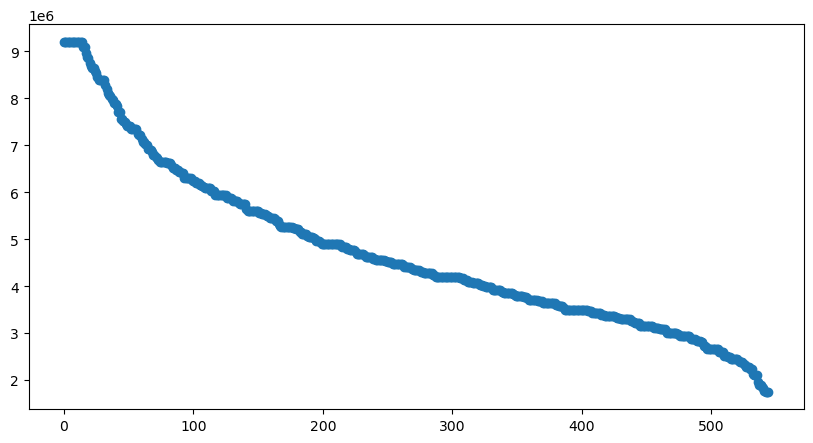

In [249]:
plt.scatter(df.index,df['price_revoutliner'])
plt.show()

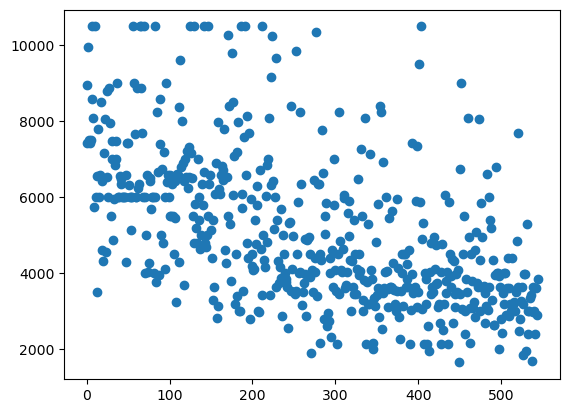

In [250]:
plt.scatter(df.index,df['area_revoutliner'])
plt.show()



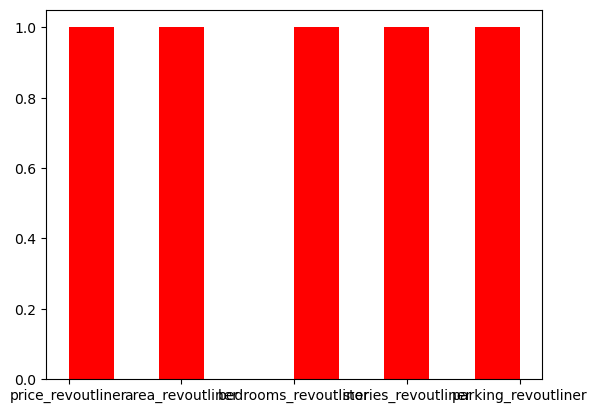

In [277]:
plt.hist(['price_revoutliner','area_revoutliner','bedrooms_revoutliner','stories_revoutliner','parking_revoutliner'],color='r')
plt.show()

# DENSITY PLOTS

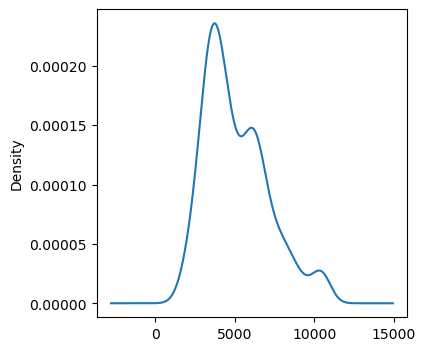

In [253]:
plt.figure(figsize=(4,4)) #oriznel 
df['area_revoutliner'].plot(kind='kde')
plt.show()



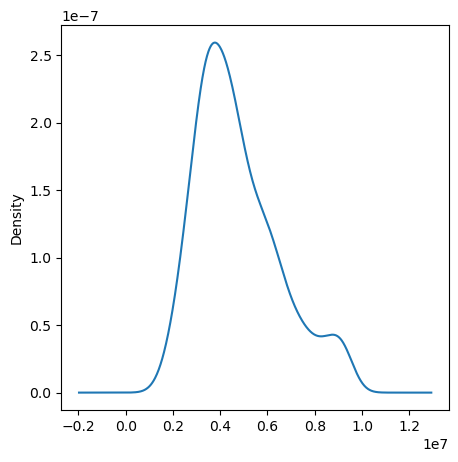

In [254]:
plt.figure(figsize=(5,5)) 
df['price_revoutliner'].plot(kind='kde')
plt.show()

# ●	Bi-Variate Analysis
# finding correlation between two columns 

In [271]:
df=df.drop(['price','area','bedrooms','stories','mainroad','guestroom','basement','hotwaterheating','airconditioning','parking','furnishingstatus','bathrooms'],axis=1)

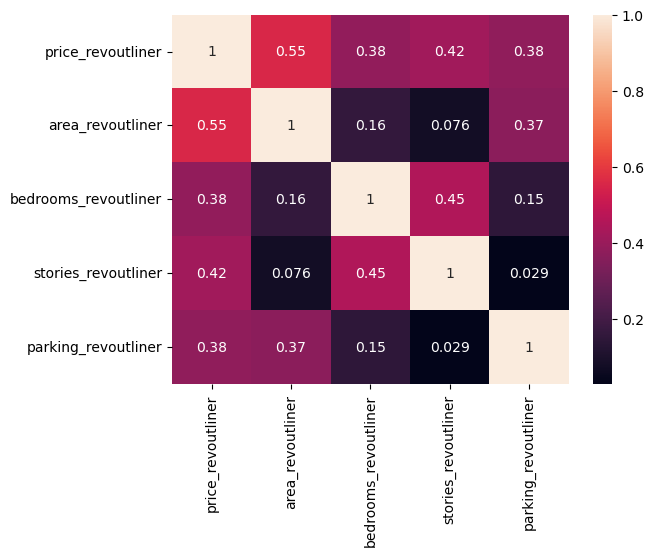

In [272]:
sns.heatmap(df.corr(),annot=True)
plt.show()
import warnings
warnings.filterwarnings('ignore')

##### with  Bivariate Analysis we got to know that there is a relation between price_revoutliner and area_out_revoutliner it's means if area_revoutliner value will go then high price_out_revoutliner will go high and if area discrise price go down  

# Correlation Analysis

In [283]:
import scipy

In [295]:
from scipy.stats.stats import pearsonr

In [296]:
x=df[['price_revoutliner','area_revoutliner','bedrooms_revoutliner','stories_revoutliner','parking_revoutliner']]

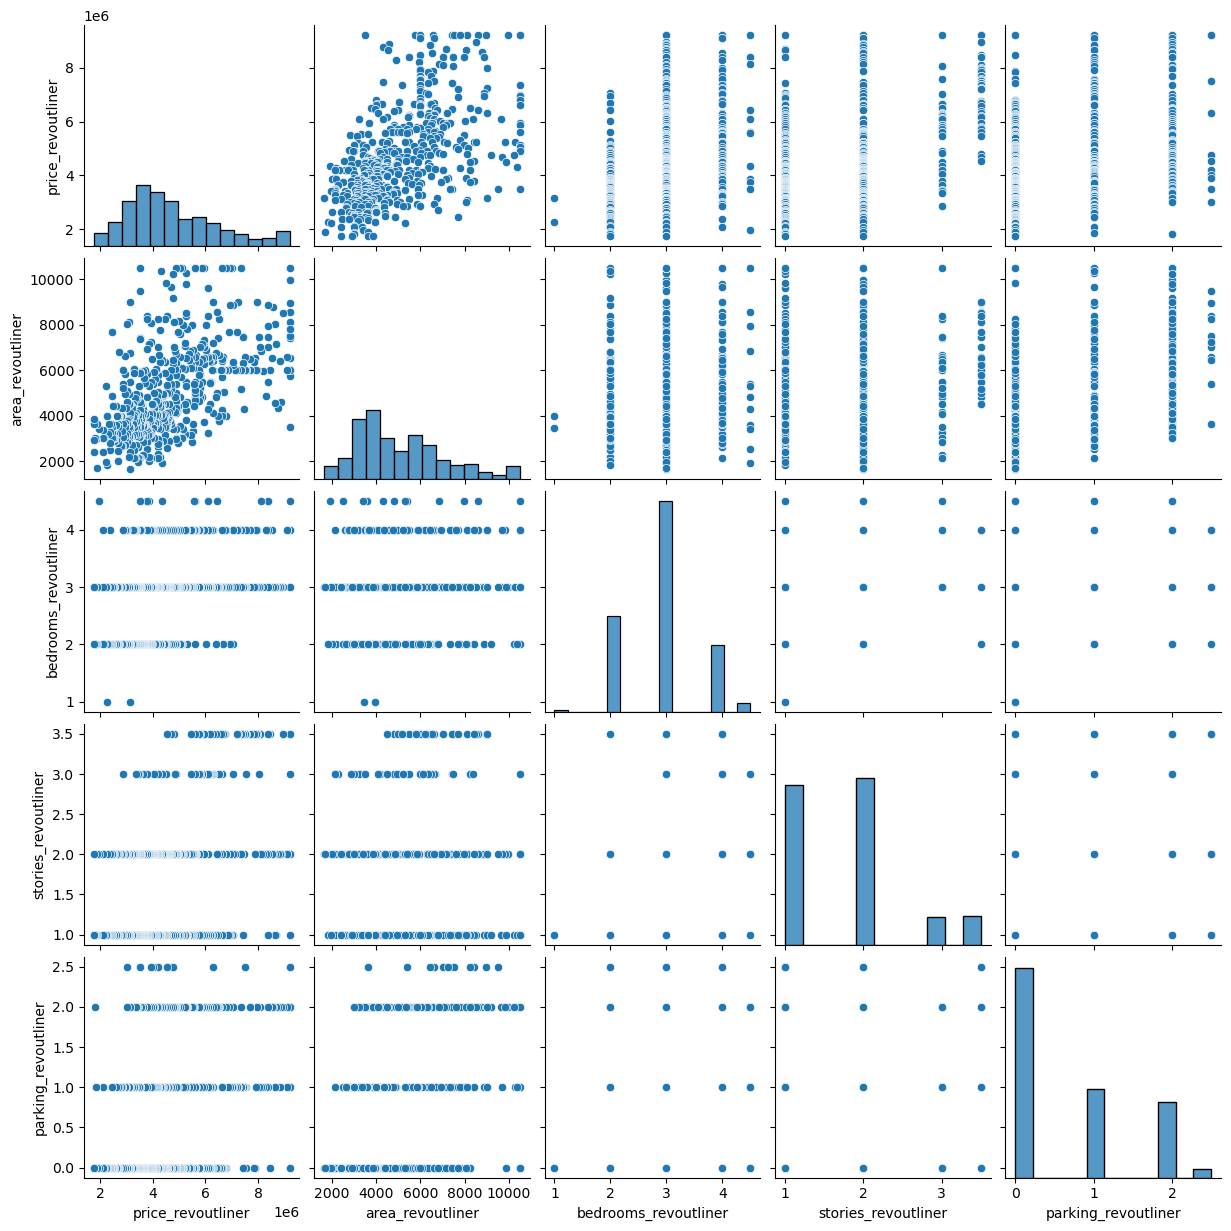

In [297]:
sns.pairplot(x)

In [303]:
price=df['price_revoutliner']
area=df['area_revoutliner']
pearsonr_cofficient,p_value=pearsonr(price,area)
print('pearsonR_correlation cofficient: %0.3f'%(pearsonr_cofficient))

pearsonR_correlation cofficient: 0.554


# 55% both data Correlation with each other 